#Analysis of AtliQ Hotels.



Datasets

1. dim_date

2. dim_hotels

3. dim_rooms

4. fact_aggregated_bookings

5. fact_bookings

6. new_data_august

###Import Libraries and read data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline

In [ ]:
date = pd.read_csv('/content/dim_date.csv')
hotels = pd.read_csv('/content/dim_hotels.csv')
rooms = pd.read_csv('/content/dim_rooms.csv')
agg_booking = pd.read_csv('/content/fact_aggregated_bookings.csv')
bookings = pd.read_csv('/content/fact_bookings.csv')
new_data_aug = pd.read_csv('/content/new_data_august.csv')

###Data Exploration

In [ ]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


We can see that date column is object data type. Lets convert it into date data type.

In [ ]:
date.date = pd.to_datetime(date['date'])

<ipython-input-638-fbebc8cc05be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date.date = pd.to_datetime(date['date'])


In [ ]:
date['mmm yy'] = (date['mmm yy']).str.replace('22','2022')
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 2022,W 19,weekend
1,2022-05-02,May 2022,W 19,weekeday
2,2022-05-03,May 2022,W 19,weekeday
3,2022-05-04,May 2022,W 19,weekeday
4,2022-05-05,May 2022,W 19,weekeday


In [ ]:
#date['mmm yy'] = pd.to_datetime(date['mmm yy'], format="%b %Y")

In [ ]:
#date.info()

In [ ]:
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 2022,W 19,weekend
1,2022-05-02,May 2022,W 19,weekeday
2,2022-05-03,May 2022,W 19,weekeday
3,2022-05-04,May 2022,W 19,weekeday
4,2022-05-05,May 2022,W 19,weekeday


In [ ]:
date.shape

(92, 4)

In [ ]:
date['mmm yy'].unique()

array(['May 2022', 'Jun 2022', 'Jul 2022'], dtype=object)

In [ ]:
date.day_type.unique()

array(['weekend', 'weekeday'], dtype=object)

we have spell error in day_type column. Lets replace it.

In [ ]:
date.day_type.replace('weekeday', 'weekday', inplace=True)

In [ ]:
date.day_type.unique()

array(['weekend', 'weekday'], dtype=object)

In [ ]:
date['week no'].unique()

array(['W 19', 'W 20', 'W 21', 'W 22', 'W 23', 'W 24', 'W 25', 'W 26',
       'W 27', 'W 28', 'W 29', 'W 30', 'W 31', 'W 32'], dtype=object)

In [ ]:
date['mmm yy'].unique()

array(['May 2022', 'Jun 2022', 'Jul 2022'], dtype=object)

In [ ]:
date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [ ]:
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 2022,W 19,weekend
1,2022-05-02,May 2022,W 19,weekday
2,2022-05-03,May 2022,W 19,weekday
3,2022-05-04,May 2022,W 19,weekday
4,2022-05-05,May 2022,W 19,weekday


Lets move to Hotels data

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [ ]:
hotels.shape

(25, 4)

In [ ]:
hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

There are totally 7 hotels.

In [ ]:
hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [ ]:
hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [ ]:
hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


We have Luxury, Business class hotels in Delhi, Mumbai, Bangalore, Hyderabad.

In [ ]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [ ]:
rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


It is dimension table and data seems to be clean.

In [ ]:
agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


Date column seems to be object, must be converted to date type.

In [ ]:
agg_booking.check_in_date.unique()

array(['1-May-22', '2-May-22', '3-May-22', '4-May-22', '5-May-22',
       '6-May-22', '7-May-22', '8-May-22', '9-May-22', '10-May-22',
       '11-May-22', '12-May-22', '13-May-22', '14-May-22', '15-May-22',
       '16-May-22', '17-May-22', '18-May-22', '19-May-22', '20-May-22',
       '21-May-22', '22-May-22', '23-May-22', '24-May-22', '25-May-22',
       '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
       '31-May-22', '1-Jun-22', '2-Jun-22', '3-Jun-22', '4-Jun-22',
       '5-Jun-22', '6-Jun-22', '7-Jun-22', '8-Jun-22', '9-Jun-22',
       '10-Jun-22', '11-Jun-22', '12-Jun-22', '13-Jun-22', '14-Jun-22',
       '15-Jun-22', '16-Jun-22', '17-Jun-22', '18-Jun-22', '19-Jun-22',
       '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22', '24-Jun-22',
       '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
       '30-Jun-22', '1-Jul-22', '2-Jul-22', '3-Jul-22', '4-Jul-22',
       '5-Jul-22', '6-Jul-22', '7-Jul-22', '8-Jul-22', '9-Jul-22',
       '10-Jul-22',

In [ ]:
agg_booking.check_in_date = pd.to_datetime(agg_booking['check_in_date'])
agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9198 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 359.5+ KB


<ipython-input-662-c98166d4b3ed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_booking.check_in_date = pd.to_datetime(agg_booking['check_in_date'])


In [ ]:
agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [ ]:
agg_booking[agg_booking['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,2022-05-01,RT1,22,NaN
14,17562,2022-05-01,RT1,12,NaN


We have 2 null values, we can either remove them or treat the null values. To treat them we need an idea of the capacity, that we can get them from the room_category.

In [ ]:
rt1 = agg_booking[agg_booking['room_category']== 'RT1']
rt1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [ ]:
rt1.capacity.mean(), rt1.capacity.median(), rt1.capacity.mode()

(28.885117493472585,
 30.0,
 0    30.0
 Name: capacity, dtype: float64)

For rt1 room cateogry we get average capacity of 28 but median, mode gives us 30. So, we will fil the nan values with 30.

In [ ]:
agg_booking['capacity'] = agg_booking['capacity'].median()
agg_booking['capacity'].isnull().sum()

0

In [ ]:
agg_booking.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity
9195,16563,2022-07-31,RT4,13,25.0
9196,16559,2022-07-31,RT4,13,25.0
9197,17558,2022-07-31,RT4,3,25.0
9198,19563,2022-07-31,RT4,3,25.0
9199,17561,2022-07-31,RT4,3,25.0


In [ ]:
agg_booking.shape

(9200, 5)

In [ ]:
agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 359.5+ KB


We treated the null values.

In [ ]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


we can find some null values in guest and ratings given. Lets treat guest column. It is intuitive that ratings column could have null values, as all the customers will not rate. we also find that check in date data type also to be changed.

In [ ]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
bookings[bookings['no_guests'].isnull()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,NaN,RT2,logtrip,4.0,Checked Out,12600,12600
43,May012216558RT35,16558,29-04-22,1/5/2022,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
46,May012216558RT38,16558,27-04-22,1/5/2022,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800


There are only 3 records with null values, we can either remove it or treat it. For treating the null values, we have to compare the no of guests and capacity in room category rt2 and rt3. We can also see that there are some negative values in no of guests column, it may be due to data extraction problem, we are going to treat them also. We can also see that there also some outliers in the revenue generated column.

In [ ]:
bookings[bookings['no_guests']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


We are going to remove the '-' from the data.


In [ ]:
bookings['no_guests'] = bookings['no_guests'].abs()     #str.replace('-',' ', inplace=True)

In [ ]:
bookings[bookings['no_guests']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


We removed the negation. We can see that the check in date is object type, we are going to convert that into date. For analysis, we are going to use only check in date.

In [ ]:
#bookings.check_in_date = pd.to_datetime(bookings['check_in_date'])
#bookings.info()

In [ ]:
bookings.check_in_date.unique()

array(['1/5/2022', '2/5/2022', '3/5/2022', '4/5/2022', '5/5/2022',
       '6/5/2022', '7/5/2022', '8/5/2022', '9/5/2022', '10/5/2022',
       '11/5/2022', '12/5/2022', '13-05-22', '14-05-22', '15-05-22',
       '16-05-22', '17-05-22', '18-05-22', '19-05-22', '20-05-22',
       '21-05-22', '22-05-22', '23-05-22', '24-05-22', '25-05-22',
       '26-05-22', '27-05-22', '28-05-22', '29-05-22', '30-05-22',
       '31-05-22', '1/6/2022', '2/6/2022', '3/6/2022', '4/6/2022',
       '5/6/2022', '6/6/2022', '7/6/2022', '8/6/2022', '9/6/2022',
       '10/6/2022', '11/6/2022', '12/6/2022', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1/7/2022', '2/7/2022', '3/7/2022', '4/7/2022',
       '5/7/2022', '6/7/2022', '7/7/2022', '8/7/2022', '9/7/2022',
       '10/7/2022', '11/7/2022', '12/7/2022', '13-07-22'

In [ ]:
bookings['check_in_date'] = bookings['check_in_date'].str.replace('/', '-')
bookings[bookings['check_in_date'] == '13-05-22']

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
18550,May132216558RT11,16558,10/5/2022,13-05-22,15-05-22,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
18551,May132216558RT12,16558,9/5/2022,13-05-22,14-05-22,2.0,RT1,makeyourtrip,NaN,Cancelled,9100,3640
18552,May132216558RT13,16558,9/5/2022,13-05-22,14-05-22,1.0,RT1,logtrip,NaN,Checked Out,9100,9100
18553,May132216558RT14,16558,8/5/2022,13-05-22,19-05-22,2.0,RT1,tripster,5.0,Checked Out,9100,9100
18554,May132216558RT15,16558,7/5/2022,13-05-22,18-05-22,1.0,RT1,direct online,NaN,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
19932,May132217564RT43,17564,8/5/2022,13-05-22,14-05-22,4.0,RT4,makeyourtrip,2.0,Checked Out,38760,38760
19933,May132217564RT44,17564,10/5/2022,13-05-22,15-05-22,1.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920
19934,May132217564RT45,17564,13-05-22,13-05-22,14-05-22,1.0,RT4,journey,1.0,Checked Out,32300,32300
19935,May132217564RT46,17564,6/5/2022,13-05-22,14-05-22,1.0,RT4,direct online,2.0,Checked Out,32300,32300


In [ ]:
bookings.check_in_date.unique()

array(['1-5-2022', '2-5-2022', '3-5-2022', '4-5-2022', '5-5-2022',
       '6-5-2022', '7-5-2022', '8-5-2022', '9-5-2022', '10-5-2022',
       '11-5-2022', '12-5-2022', '13-05-22', '14-05-22', '15-05-22',
       '16-05-22', '17-05-22', '18-05-22', '19-05-22', '20-05-22',
       '21-05-22', '22-05-22', '23-05-22', '24-05-22', '25-05-22',
       '26-05-22', '27-05-22', '28-05-22', '29-05-22', '30-05-22',
       '31-05-22', '1-6-2022', '2-6-2022', '3-6-2022', '4-6-2022',
       '5-6-2022', '6-6-2022', '7-6-2022', '8-6-2022', '9-6-2022',
       '10-6-2022', '11-6-2022', '12-6-2022', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1-7-2022', '2-7-2022', '3-7-2022', '4-7-2022',
       '5-7-2022', '6-7-2022', '7-7-2022', '8-7-2022', '9-7-2022',
       '10-7-2022', '11-7-2022', '12-7-2022', '13-07-22'

In [ ]:
#bookings.check_in_date = pd.to_datetime(bookings['check_in_date'], dayfirst = True)
#bookings.info()

In [ ]:
bookings['check_in_date'] = bookings['check_in_date'].str.replace('2022', '22')
bookings['check_in_date'].unique()

array(['1-5-22', '2-5-22', '3-5-22', '4-5-22', '5-5-22', '6-5-22',
       '7-5-22', '8-5-22', '9-5-22', '10-5-22', '11-5-22', '12-5-22',
       '13-05-22', '14-05-22', '15-05-22', '16-05-22', '17-05-22',
       '18-05-22', '19-05-22', '20-05-22', '21-05-22', '22-05-22',
       '23-05-22', '24-05-22', '25-05-22', '26-05-22', '27-05-22',
       '28-05-22', '29-05-22', '30-05-22', '31-05-22', '1-6-22', '2-6-22',
       '3-6-22', '4-6-22', '5-6-22', '6-6-22', '7-6-22', '8-6-22',
       '9-6-22', '10-6-22', '11-6-22', '12-6-22', '13-06-22', '14-06-22',
       '15-06-22', '16-06-22', '17-06-22', '18-06-22', '19-06-22',
       '20-06-22', '21-06-22', '22-06-22', '23-06-22', '24-06-22',
       '25-06-22', '26-06-22', '27-06-22', '28-06-22', '29-06-22',
       '30-06-22', '1-7-22', '2-7-22', '3-7-22', '4-7-22', '5-7-22',
       '6-7-22', '7-7-22', '8-7-22', '9-7-22', '10-7-22', '11-7-22',
       '12-7-22', '13-07-22', '14-07-22', '15-07-22', '16-07-22',
       '17-07-22', '18-07-22', '19-07-22'

In [ ]:
bookings.check_in_date = pd.to_datetime(bookings['check_in_date'], dayfirst = True)
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134587 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 12.3+ MB


<ipython-input-684-bf0df23898b9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bookings.check_in_date = pd.to_datetime(bookings['check_in_date'], dayfirst = True)


In [ ]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,25.0
1,19562,2022-05-01,RT1,28,25.0
2,19563,2022-05-01,RT1,23,25.0
3,17558,2022-05-01,RT1,30,25.0
4,16558,2022-05-01,RT1,18,25.0


In [ ]:
# booking_merge = pd.merge(bookings, agg_booking, on = 'room_category')

In [ ]:
bookings[bookings['no_guests'].isnull()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,29-04-22,2022-05-01,2/5/2022,NaN,RT2,logtrip,4.0,Checked Out,12600,12600
43,May012216558RT35,16558,29-04-22,2022-05-01,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
46,May012216558RT38,16558,27-04-22,2022-05-01,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800


In [ ]:
agg_booking[(agg_booking['property_id'] == 16558) & (agg_booking['room_category'] == 'RT2')  ]

,property_id,check_in_date,room_category,successful_bookings,capacity
30,16558,2022-05-01,RT2,21,25.0
131,16558,2022-05-02,RT2,14,25.0
232,16558,2022-05-03,RT2,14,25.0
331,16558,2022-05-04,RT2,14,25.0
431,16558,2022-05-05,RT2,13,25.0
...,...,...,...,...,...
8731,16558,2022-07-27,RT2,12,25.0
8831,16558,2022-07-28,RT2,14,25.0
8931,16558,2022-07-29,RT2,13,25.0
9031,16558,2022-07-30,RT2,14,25.0


In [ ]:
agg_booking[(agg_booking['property_id'] == 16558) & (agg_booking['room_category'] == 'RT3')]

,property_id,check_in_date,room_category,successful_bookings,capacity
69,16558,2022-05-01,RT3,8,25.0
158,16558,2022-05-02,RT3,5,25.0
258,16558,2022-05-03,RT3,5,25.0
358,16558,2022-05-04,RT3,6,25.0
458,16558,2022-05-05,RT3,4,25.0
...,...,...,...,...,...
8758,16558,2022-07-27,RT3,3,25.0
8858,16558,2022-07-28,RT3,5,25.0
8958,16558,2022-07-29,RT3,3,25.0
9058,16558,2022-07-30,RT3,6,25.0


In [ ]:
rt2 = bookings[bookings['room_category'] == "RT2"]
rt2.room_category.unique()

array(['RT2'], dtype=object)

In [ ]:
rt2.no_guests.mean(), rt2.no_guests.median(), rt2.no_guests.mode()

(1.9690732062055591,
 2.0,
 0    2.0
 Name: no_guests, dtype: float64)

In [ ]:
rt3 = bookings[bookings['room_category'] == "RT3"]
rt3.room_category.unique()

array(['RT3'], dtype=object)

In [ ]:
rt3.no_guests.mean(), rt3.no_guests.median(), rt3.no_guests.mode()

(2.1800811412118835,
 2.0,
 0    2.0
 Name: no_guests, dtype: float64)

We can find that the null values in no_guests for room category RT2, RT3 can be filled with 2 after doing the analysis.

In [ ]:
bookings[bookings['no_guests'].isnull()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,29-04-22,2022-05-01,2/5/2022,NaN,RT2,logtrip,4.0,Checked Out,12600,12600
43,May012216558RT35,16558,29-04-22,2022-05-01,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
46,May012216558RT38,16558,27-04-22,2022-05-01,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800


In [ ]:
bookings['no_guests'] = bookings['no_guests'].fillna(2)
bookings[bookings['no_guests'].isnull()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134590 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 12.3+ MB


Lets treat the outliers.

In [ ]:
bookings['revenue_generated'].mean(), bookings['revenue_generated'].max(), bookings['revenue_generated'].min()

(15378.05412734973, 28560000, 6500)

In [ ]:
bookings['revenue_generated'].unique()

array([   10010,     9100,  9100000,    10920,    12600,    13860,
          15120,    18480,    20160,    16800,    26600,    11050,
          12155,    13260,    16830,    15300,    18360,    20400,
       28560000,    22440,    28560,    38760,    32300,    45220,
          35530,    41990,    21840,    34580,    23520,    29260,
          31920, 12600000,    24480,  2000000,    26520,     7150,
           6500,     7800,     9000,     9900,    10800,    12000,
          13200,    19000,    20900,    22800,    24700,    14400,
          15600,     9750,    11700,    10725,    13500,    14850,
          16200,    18000,    19800,    23400,    28500,    25200,
          34200,    39900,    31350,    21600,    37240,    37050,
       10000000])

In [ ]:
bookings['revenue_realized'].mean(), bookings['revenue_realized'].max(), bookings['revenue_realized'].min()

(12696.123255813953, 45220, 2600)

In [ ]:
bookings['revenue_realized'].unique()

array([10010,  3640,  9100, 10920, 12600,  5544,  5040, 15120,  6048,
       13860, 18480, 20160, 16800, 10640, 26600, 11050,  4420, 12155,
        4862,  5304, 13260, 16830, 15300,  7344, 18360,  6120,  8160,
       28560,  8976, 22440, 20400, 11424, 38760, 12920, 45220, 32300,
       35530, 41990, 15504,  4004,  8736,  6720, 34580,  7392,  9408,
       11704, 13832, 12768, 21840, 29260,  6732,  9792, 10608, 24480,
       26520,  7150,  6500,  2600,  7800,  9000,  9900, 10800,  3600,
        4800, 13200, 12000,  5280, 19000, 20900, 22800, 24700,  9120,
        7600,  3960,  4320, 14400,  2860,  3120,  8360, 15600,  9880,
        9750, 11700,  3900, 10725,  4680, 13500,  5400, 14850, 16200,
       18000,  7200,  7920,  9360, 19800, 28500,  4290,  5940, 25200,
        6480, 23400, 11400, 34200, 39900, 31350, 21600, 15960,  4368,
       14212, 23520, 37240, 31920,  8064,  5760,  8640, 10080, 18088,
        6240, 37050, 14820, 16796, 14896, 13680, 12540])

In [ ]:
rev_gen_mean = bookings['revenue_generated'].mean()
rev_gen_std = bookings['revenue_generated'].std()
upper_limit = rev_gen_mean + 3*rev_gen_std
print(upper_limit)

294486.17014021333


In [ ]:
bookings[bookings['revenue_generated']>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,2022-05-01,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,2022-05-01,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,2022-05-01,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,2022-07-28,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [ ]:
bookings = bookings[bookings['revenue_generated']<upper_limit]
bookings.shape

(134585, 12)

In [ ]:
rev_real_mean = bookings['revenue_realized'].mean()
rev_real_std = bookings['revenue_realized'].std()
upper_limit = rev_real_mean + 3*rev_real_std
print(upper_limit)

33480.26960155918


In [ ]:
bookings[bookings['revenue_realized']>upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,2022-05-01,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,2022-05-01,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,2022-05-01,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,2022-05-01,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,2022-05-01,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,2022-07-31,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,2022-07-31,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,2022-07-31,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,2022-07-31,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


There are 1300 rows as outliers which is not normal. Lets check the room category the belong.

In [ ]:
outliers_real_rev = bookings[bookings['revenue_realized']>upper_limit]
outliers_real_rev

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,2022-05-01,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,2022-05-01,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,2022-05-01,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,2022-05-01,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,2022-05-01,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,2022-07-31,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,2022-07-31,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,2022-07-31,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,2022-07-31,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [ ]:
outliers_real_rev['room_category'].unique()

array(['RT4'], dtype=object)

In [ ]:
rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Only RT4 categories are in outliers, lets check their mean and std.

In [ ]:
rt4_bookings = bookings[bookings['room_category'] == 'RT4']
rt4_mean = rt4_bookings.revenue_realized.mean(),
rt4_std = rt4_bookings.revenue_realized.std()
print(rt4_mean, rt4_std)

(23440.103652087353,) 9048.865205740152


In [ ]:
rt4_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
47,May012216558RT41,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT4,logtrip,NaN,Cancelled,26600,10640
48,May012216558RT42,16558,27-04-22,2022-05-01,2/5/2022,1.0,RT4,tripster,NaN,Checked Out,26600,26600
49,May012216558RT43,16558,29-04-22,2022-05-01,4/5/2022,2.0,RT4,direct offline,NaN,Cancelled,26600,10640
137,May012216559RT41,16559,27-04-22,2022-05-01,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
138,May012216559RT42,16559,11/4/2022,2022-05-01,3/5/2022,2.0,RT4,direct offline,NaN,Cancelled,32300,12920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
upper = rt4_mean + 3*rt4_std
print(upper)

[50586.69926931]


In [ ]:
bookings[bookings['revenue_realized']>upper[0]]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
bookings.shape

(134585, 12)

We have treated the outliers.

In [ ]:
new_data_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          7 non-null      int64  
 1   property_name        7 non-null      object 
 2   category             7 non-null      object 
 3   city                 7 non-null      object 
 4   room_category        7 non-null      object 
 5   room_class           7 non-null      object 
 6   check_in_date        7 non-null      object 
 7   mmm yy               7 non-null      object 
 8   week no              7 non-null      object 
 9   day_type             7 non-null      object 
 10  successful_bookings  7 non-null      int64  
 11  capacity             7 non-null      int64  
 12  occ%                 7 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 856.0+ bytes


We have to convert date in string type to date type

In [ ]:
new_data_aug.head(10)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [ ]:
new_data_aug['check_in_date'] = pd.to_datetime(new_data_aug['check_in_date'])
new_data_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          7 non-null      int64         
 1   property_name        7 non-null      object        
 2   category             7 non-null      object        
 3   city                 7 non-null      object        
 4   room_category        7 non-null      object        
 5   room_class           7 non-null      object        
 6   check_in_date        7 non-null      datetime64[ns]
 7   mmm yy               7 non-null      object        
 8   week no              7 non-null      object        
 9   day_type             7 non-null      object        
 10  successful_bookings  7 non-null      int64         
 11  capacity             7 non-null      int64         
 12  occ%                 7 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64

<ipython-input-716-03232d0c1f42>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data_aug['check_in_date'] = pd.to_datetime(new_data_aug['check_in_date'])


In [ ]:
new_data_aug['day_type'] = new_data_aug['day_type'].str.replace('weekeday', 'weekday')
new_data_aug.head(10)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,10,16,62.50


We have cleaned the data. Now lets create insights.

##Insights

1. Avg occupancy rate of all room categories

2. Avg occpancy /city.

3. When was occupancy better weekday or weekend?

4. For June month, what is occupancy for different cities?

5. Revenue realized / city.

6. Month by Month revenue.

7. Print revenue realized / hotels.

8. Average rating / city.

9. Revenue realized by each booking platform.

In [ ]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [ ]:
bookings.shape

(134585, 12)

In [ ]:
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,25.0
1,19562,2022-05-01,RT1,28,25.0
2,19563,2022-05-01,RT1,23,25.0
3,17558,2022-05-01,RT1,30,25.0
4,16558,2022-05-01,RT1,18,25.0


In [ ]:
agg_booking.shape

(9200, 5)

**Avg occupancy rate of all room categories**

In [ ]:
agg_booking['occupancy_rate'] = (agg_booking['successful_bookings']/agg_booking['capacity'])*100
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,2022-05-01,RT1,25,25.0,100.0
1,19562,2022-05-01,RT1,28,25.0,112.0
2,19563,2022-05-01,RT1,23,25.0,92.0
3,17558,2022-05-01,RT1,30,25.0,120.0
4,16558,2022-05-01,RT1,18,25.0,72.0


In [ ]:
agg_booking['occupancy_rate'].mean().round(2)

58.62

In [ ]:
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


**Avg occpancy /city.**

In [ ]:
agg_booking = pd.merge(agg_booking, hotels, on = 'property_id')
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,property_name,category,city
0,16559,2022-05-01,RT1,25,25.0,100.0,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-01,RT2,35,25.0,140.0,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-01,RT3,27,25.0,108.0,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-01,RT4,17,25.0,68.0,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-02,RT1,20,25.0,80.0,Atliq Exotica,Luxury,Mumbai


In [ ]:
occ_city = agg_booking.groupby('city')['occupancy_rate'].mean().sort_values(ascending = False)
occ_city

city
Hyderabad    63.219203
Mumbai       59.065217
Bangalore    58.277174
Delhi        52.815217
Name: occupancy_rate, dtype: float64

We are going to maintain same colors for the city throughout the process.

In [ ]:
city_colors = ['#ffa500', '#003366', '#ccff00', '#c0c0c0']
city_order = ['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore']
sns.set_palette(sns.color_palette(city_colors))

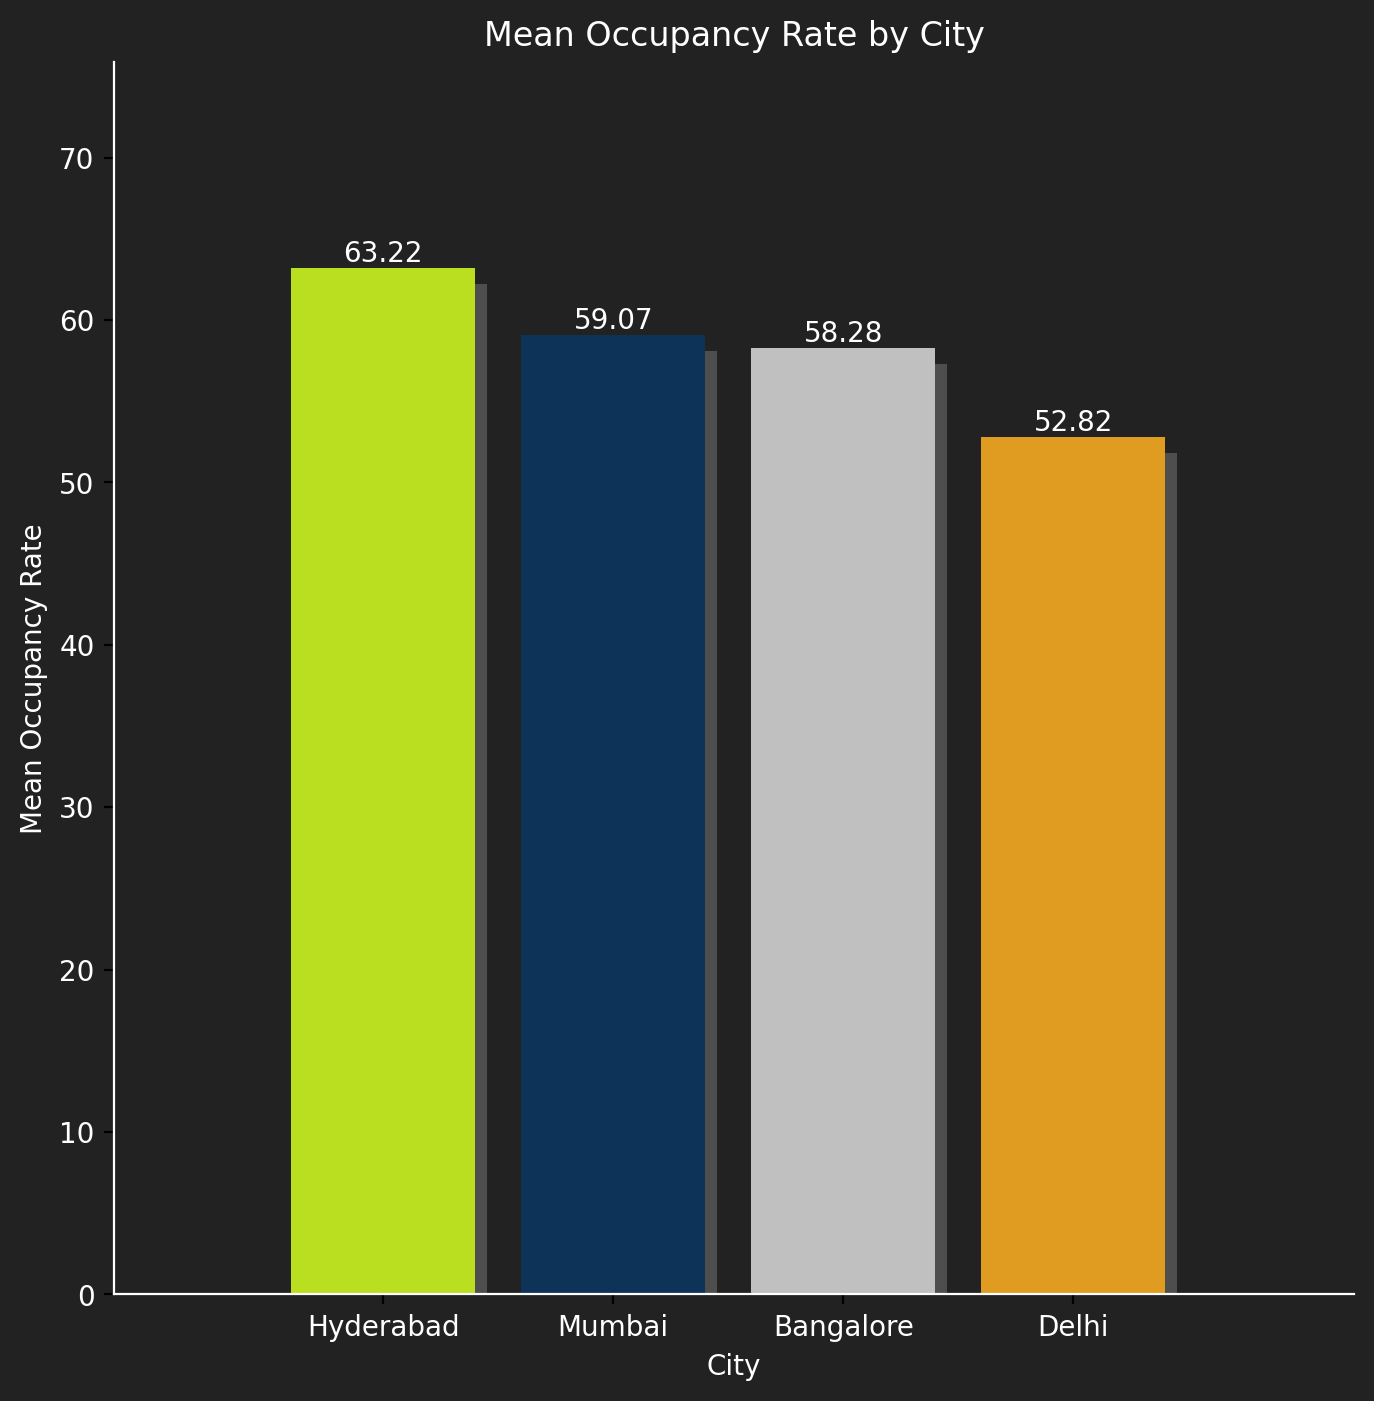

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi =200)
sns.barplot(x=occ_city.index,
            y=occ_city.values,
            hue = occ_city.index,
            hue_order=city_order)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(occ_city.index))
vertical_offset = 1

for i in range(len(occ_city.index)):
    val = occ_city[i]
    plt.bar(index[i] + shadow_offset, val - vertical_offset, color = "#ffffff", width = bar_width, alpha = 0.2, zorder = 0)
    plt.text(i, occ_city.values[i],str(round(occ_city.values[i],2)), ha='center', va='bottom', color = 'white')


plt.title('Mean Occupancy Rate by City', color = 'white')
plt.xlabel('City', color = 'white')
plt.ylabel('Mean Occupancy Rate', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
sns.despine(top=True, right=True)
plt.margins(0.2)
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')

for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.show()
plt.savefig('Mean_occupancy_rate_by_city.png')

**When was occupancy better weekday or weekend?**

In [ ]:
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 2022,W 19,weekend
1,2022-05-02,May 2022,W 19,weekday
2,2022-05-03,May 2022,W 19,weekday
3,2022-05-04,May 2022,W 19,weekday
4,2022-05-05,May 2022,W 19,weekday


In [ ]:
agg_booking = pd.merge(agg_booking, date, left_on ="check_in_date", right_on = 'date' )
agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,25.0,100.0,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 2022,W 19,weekend
1,16559,2022-05-01,RT2,35,25.0,140.0,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 2022,W 19,weekend
2,16559,2022-05-01,RT3,27,25.0,108.0,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 2022,W 19,weekend
3,16559,2022-05-01,RT4,17,25.0,68.0,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 2022,W 19,weekend
4,19562,2022-05-01,RT1,28,25.0,112.0,Atliq Bay,Luxury,Bangalore,2022-05-01,May 2022,W 19,weekend


In [ ]:
occ_day = agg_booking.groupby('day_type')['occupancy_rate'].mean()
occ_day

day_type
weekday    51.931692
weekend    74.731852
Name: occupancy_rate, dtype: float64

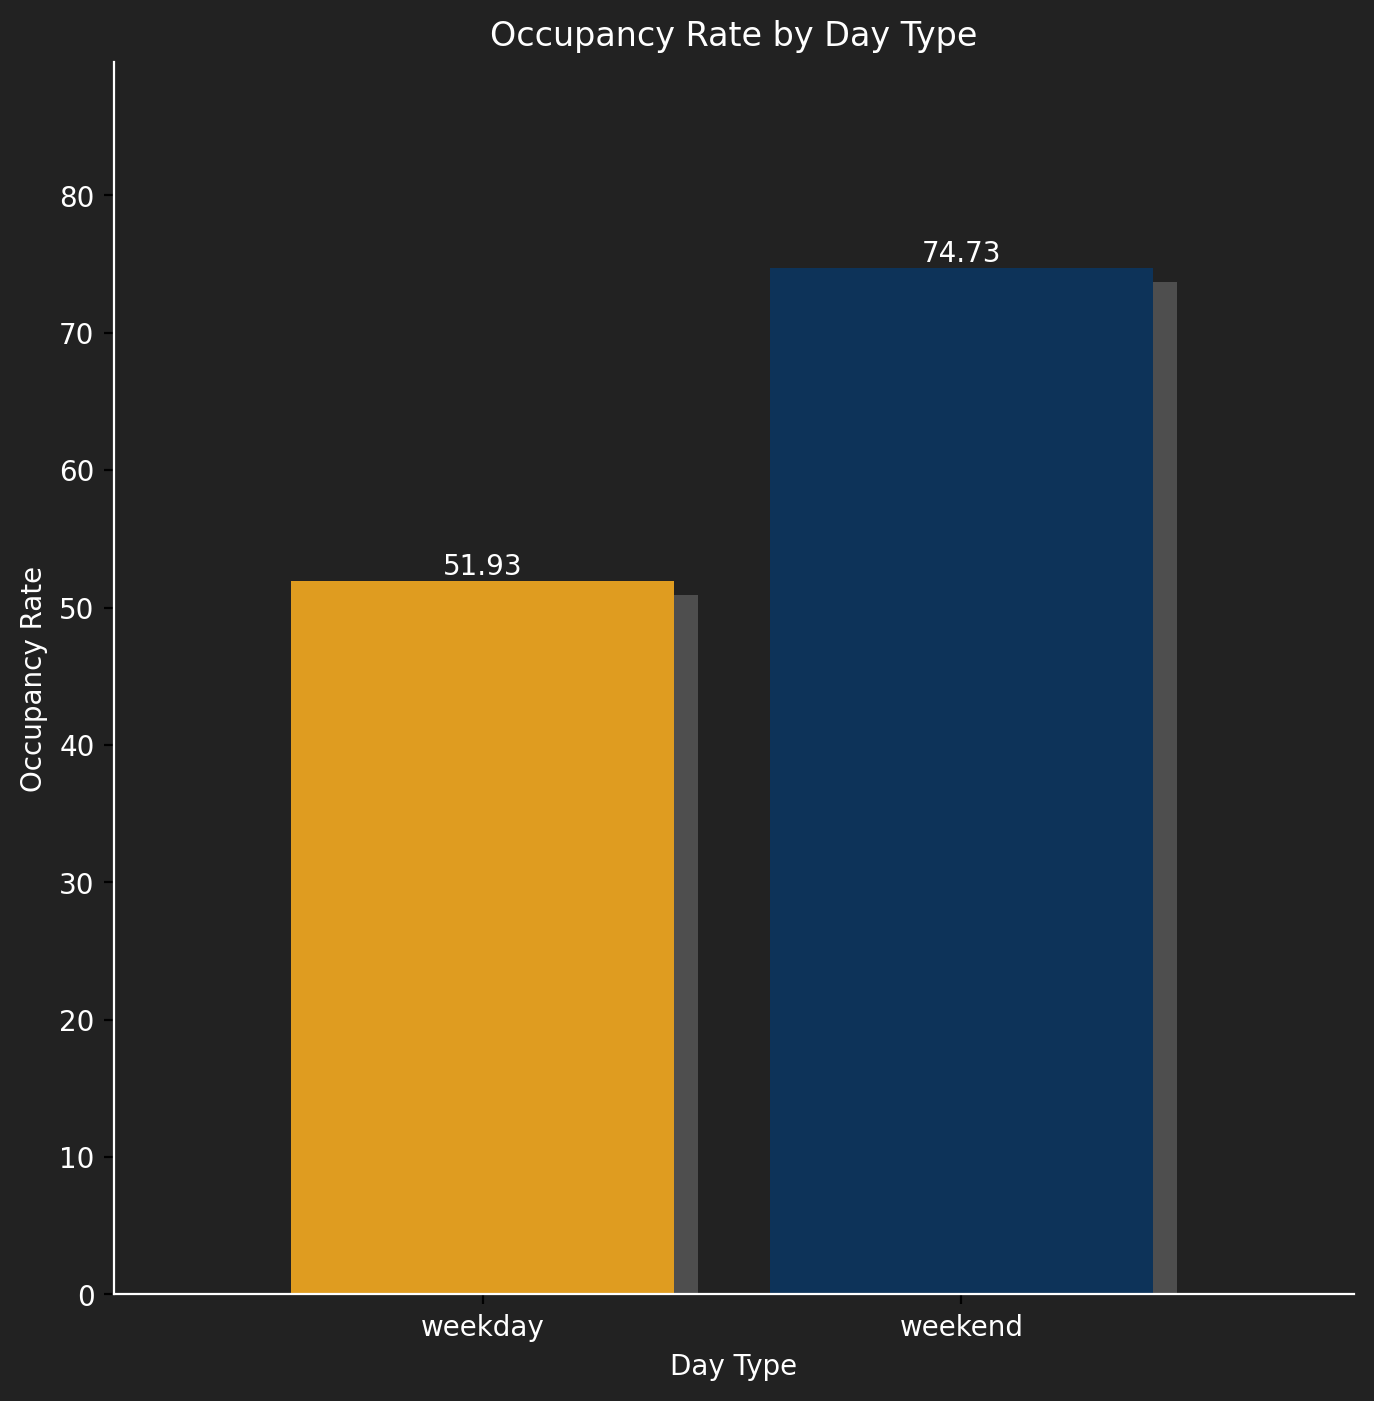

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi =200)
sns.barplot(x = occ_day.index, y = occ_day.values, hue = occ_day.index)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(occ_day.index))
vertical_offset = 1

for i in range(len(occ_day.index)):
    val = occ_day[i]
    plt.bar(index[i] + shadow_offset, val - vertical_offset, color="#ffffff", width = bar_width, alpha = 0.2, zorder = 0)
    plt.text(i,occ_day.values[i], str(round(occ_day.values[i],2)), ha = 'center', va = 'bottom', color = 'white')

plt.title('Occupancy Rate by Day Type', color = 'white')
plt.ylabel('Occupancy Rate', color = 'white')
plt.xlabel('Day Type' , color = 'white')
plt.gca().set_facecolor('#222222')
plt.gcf().set_facecolor('#222222')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
sns.despine(top=True, right=True)

for spines in plt.gca().spines.values():
  spines.set_color('white')
plt.margins(0.2)
plt.show()
plt.savefig('Occupancy by Day Type.Png')

**For June month, what is occupancy for different cities?**



In [ ]:
city_june = agg_booking[agg_booking['mmm yy'] == 'Jun 2022'].groupby('city')['occupancy_rate'].mean().sort_values(ascending = False)
city_june

city
Hyderabad    62.761111
Mumbai       58.829167
Bangalore    57.794444
Delhi        52.620000
Name: occupancy_rate, dtype: float64

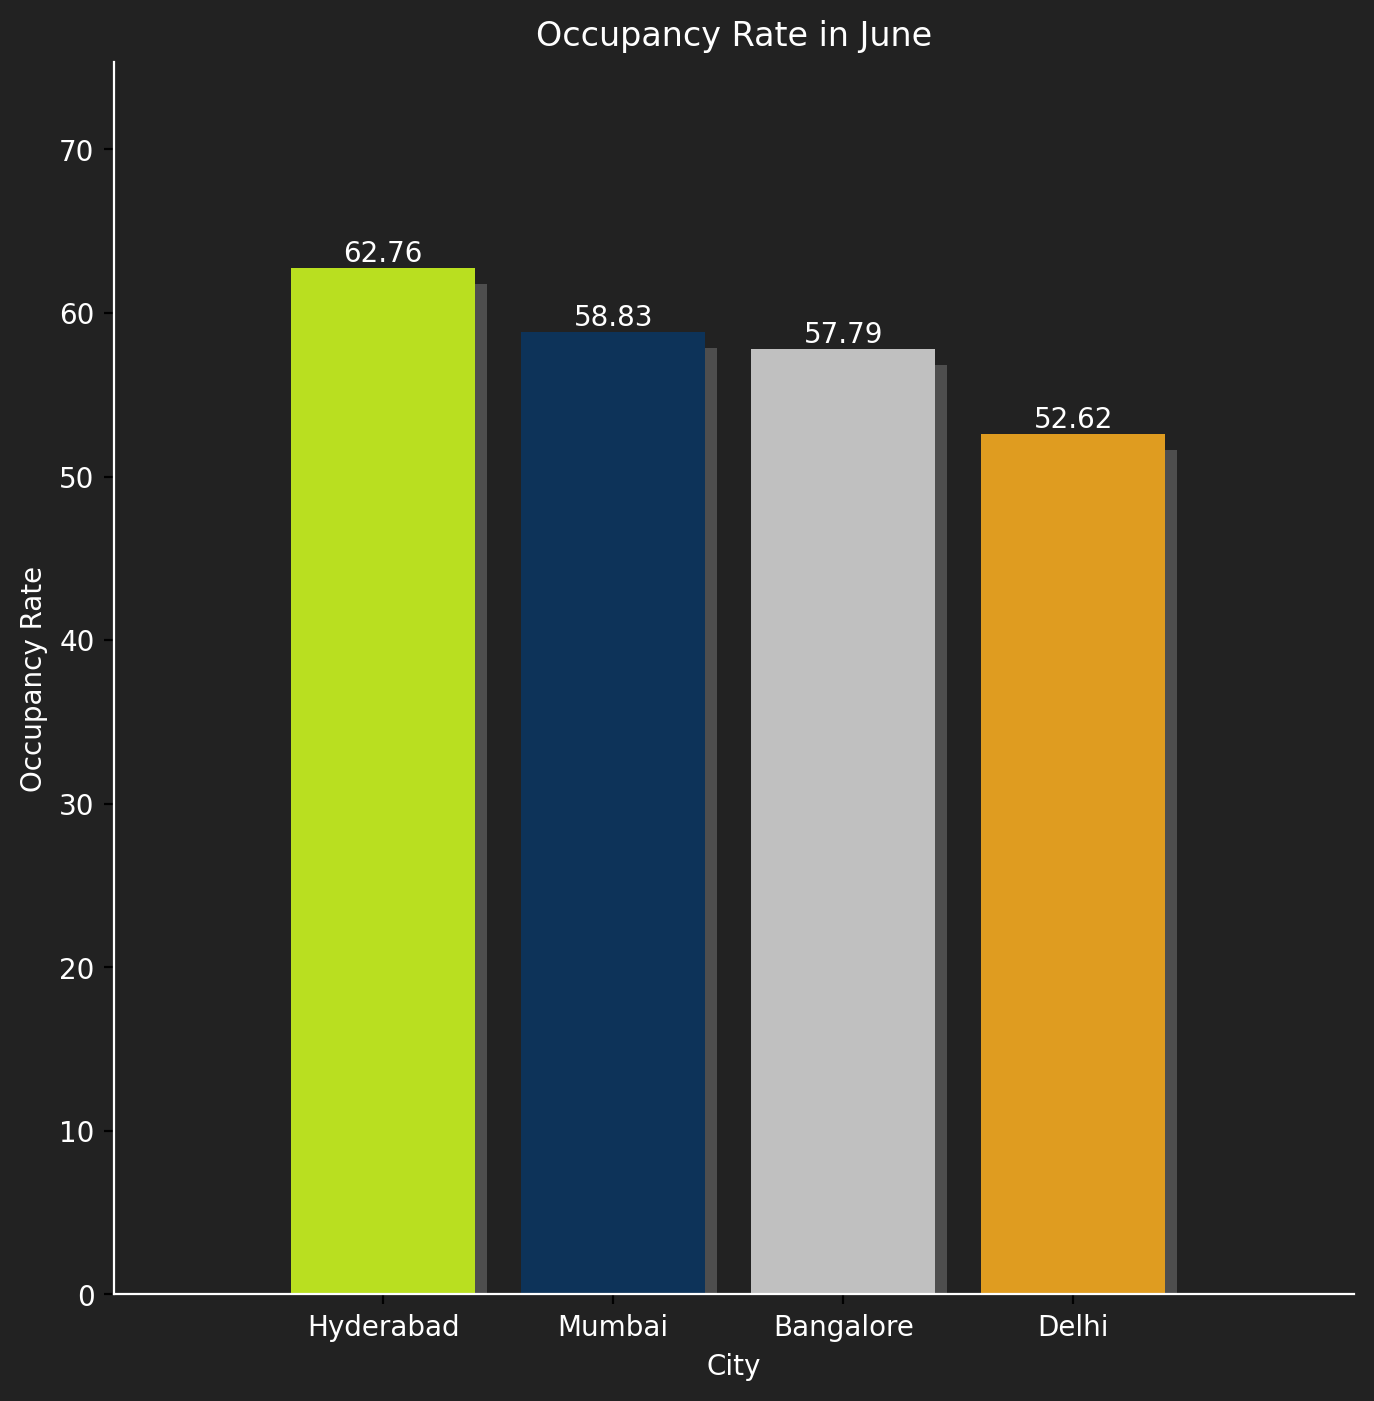

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi = 200)
sns.barplot(x = city_june.index ,
            y = city_june.values,
            hue = city_june.index,
            hue_order = city_order)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(city_june.index))
vertical_offset = 1
for i in range(len(city_june.index)):
    val = city_june[i]
    plt.bar(index[i] + shadow_offset, val - vertical_offset, color ='#ffffff', width = bar_width, alpha = 0.2, zorder = 0)
    plt.text(i, city_june[i], str(round(city_june[i],2)), ha = 'center', va = 'bottom', color = 'white')

plt.title('Occupancy Rate in June', color ='white')
plt.ylabel('Occupancy Rate' , color = 'white')
plt.xlabel('City', color = 'white')
sns.despine(top =True, right = True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')

for spine in plt.gca().spines.values():
  spine.set_color('white')

plt.margins(0.2)
plt.show()
plt.savefig('Occupancy Rate in June.png')

<Axes: xlabel='city'>

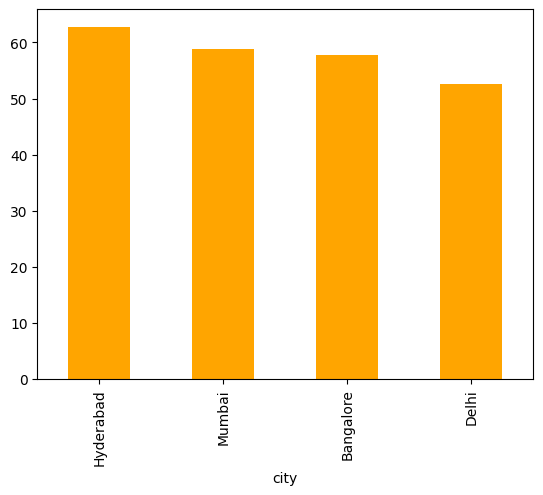

In [ ]:
city_june.plot(kind = 'bar')

**Revenue realized / city.**

In [ ]:
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [ ]:
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
bookings = pd.merge(bookings, hotels, on = "property_id")
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
city_revenue = bookings.groupby('city')['revenue_realized'].sum().sort_values(ascending = False)
city_revenue

city
Mumbai       668608011
Bangalore    420397050
Hyderabad    325232870
Delhi        294466018
Name: revenue_realized, dtype: int64

<ipython-input-758-f3bf6097059c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f"{y / 1_000_000:.1f}M" for y in y_labels], color='white')


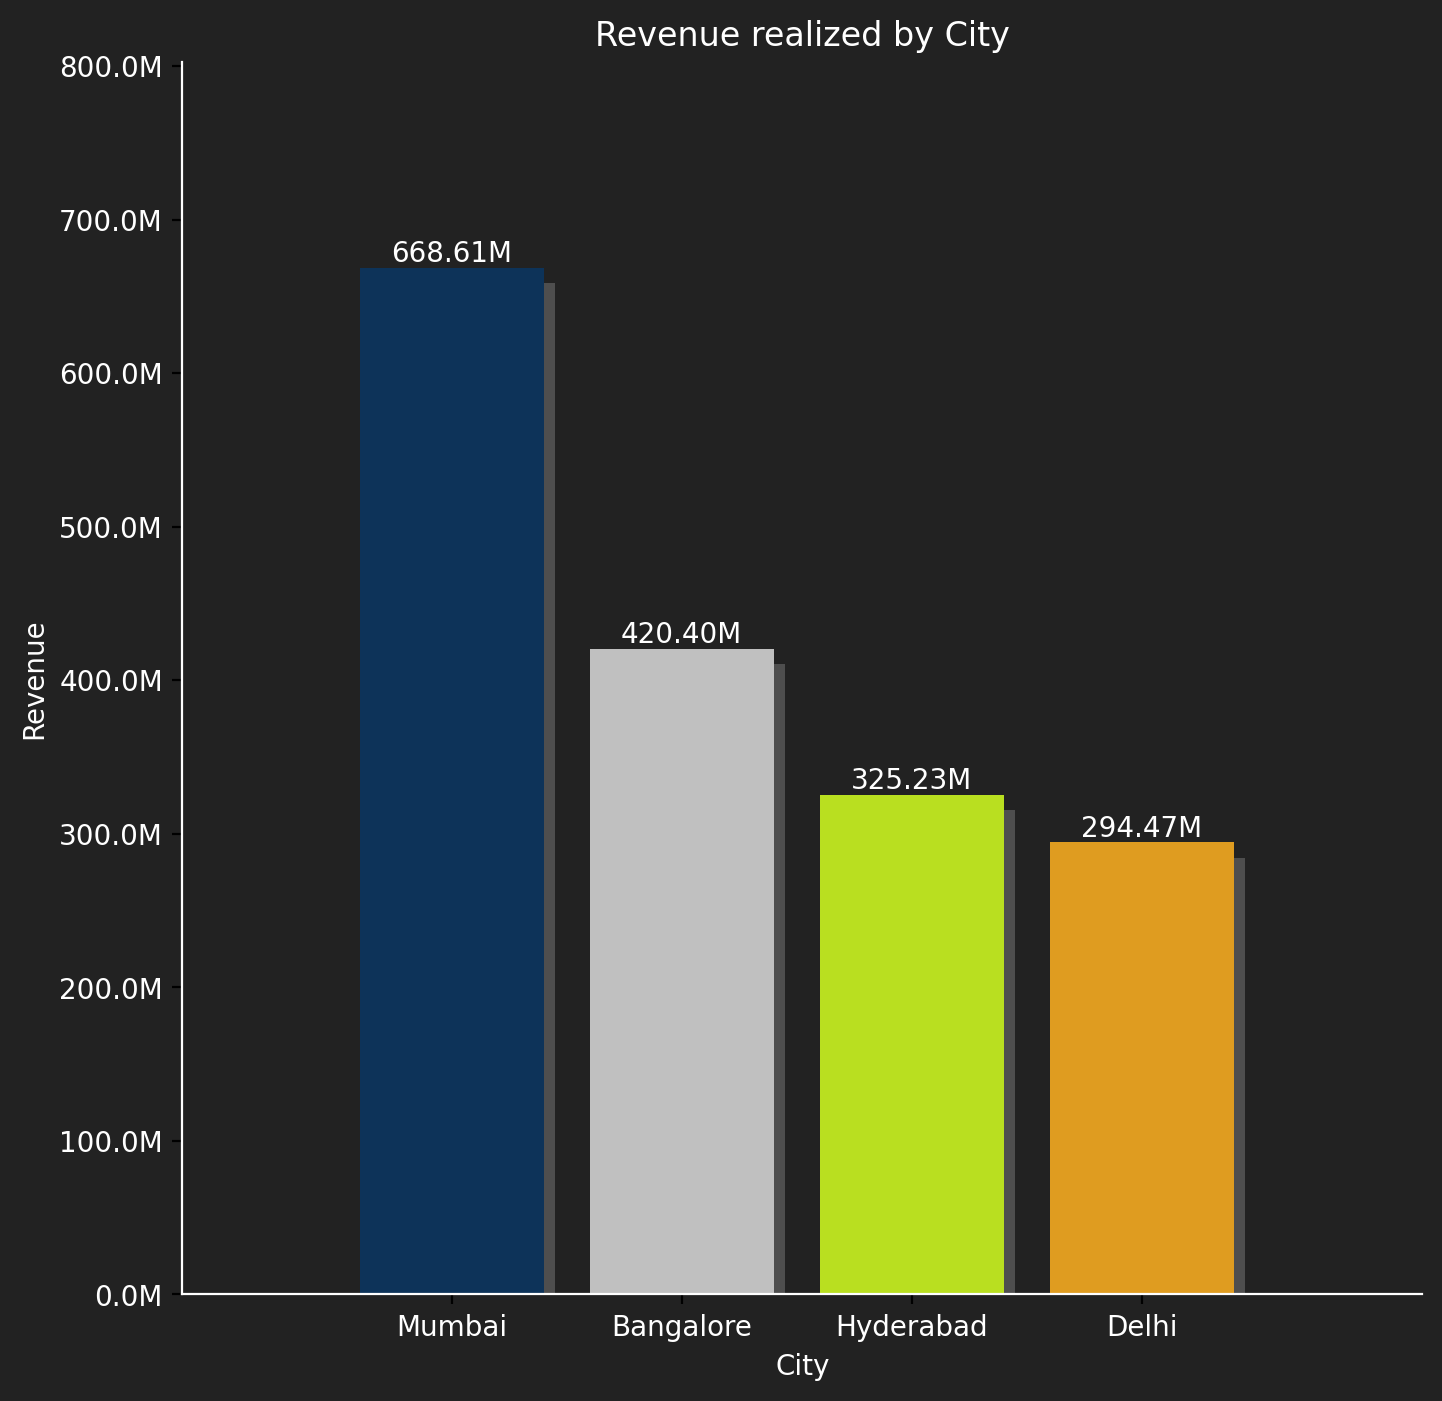

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi = 200)
sns.barplot(x = city_revenue.index,
            y = city_revenue.values,
            hue = city_revenue.index,
            hue_order = city_order)


shadow_offset = 0.05
bar_width = 0.8
index = range(len(city_revenue.index))
vertical_offset = 10000000

for i in range(len(city_revenue.index)):
  val = city_revenue[i]
  label = f'{val/1000000:.2f}M'
  plt.bar(index[i] + shadow_offset, val - vertical_offset, color='#ffffff', alpha=0.2, width=bar_width, zorder=0)
  plt.text(i, val, label, ha = 'center', va = 'bottom', color = 'white' )

plt.title('Revenue realized by City', color ='white')
plt.xlabel('City', color = 'white')
plt.ylabel('Revenue', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
sns.despine(top=True, right = True)
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')

plt.ticklabel_format(style='plain', axis='y')

y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f"{y / 1_000_000:.1f}M" for y in y_labels], color='white')

for spine in plt.gca().spines.values():
  spine.set_color('white')

plt.margins(0.2)
plt.show()
plt.savefig('Revenue realized by City.png')

**Month by Month revenue.**

In [ ]:
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 2022,W 19,weekend
1,2022-05-02,May 2022,W 19,weekday
2,2022-05-03,May 2022,W 19,weekday
3,2022-05-04,May 2022,W 19,weekday
4,2022-05-05,May 2022,W 19,weekday


In [ ]:
bookings = pd.merge(bookings, date, left_on ="check_in_date", right_on = 'date' )
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 2022,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 2022,W 19,weekend
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 2022,W 19,weekend
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 2022,W 19,weekend
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 2022,W 19,weekend


In [ ]:
month_bookings = bookings.groupby('mmm yy')['revenue_realized'].sum().sort_index(ascending = False)
month_bookings

mmm yy
May 2022    581875986
Jun 2022    553932355
Jul 2022    572895608
Name: revenue_realized, dtype: int64

<ipython-input-759-51e524d0913a>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y/1000000:.0f}M' for y in y_labels], color='white')


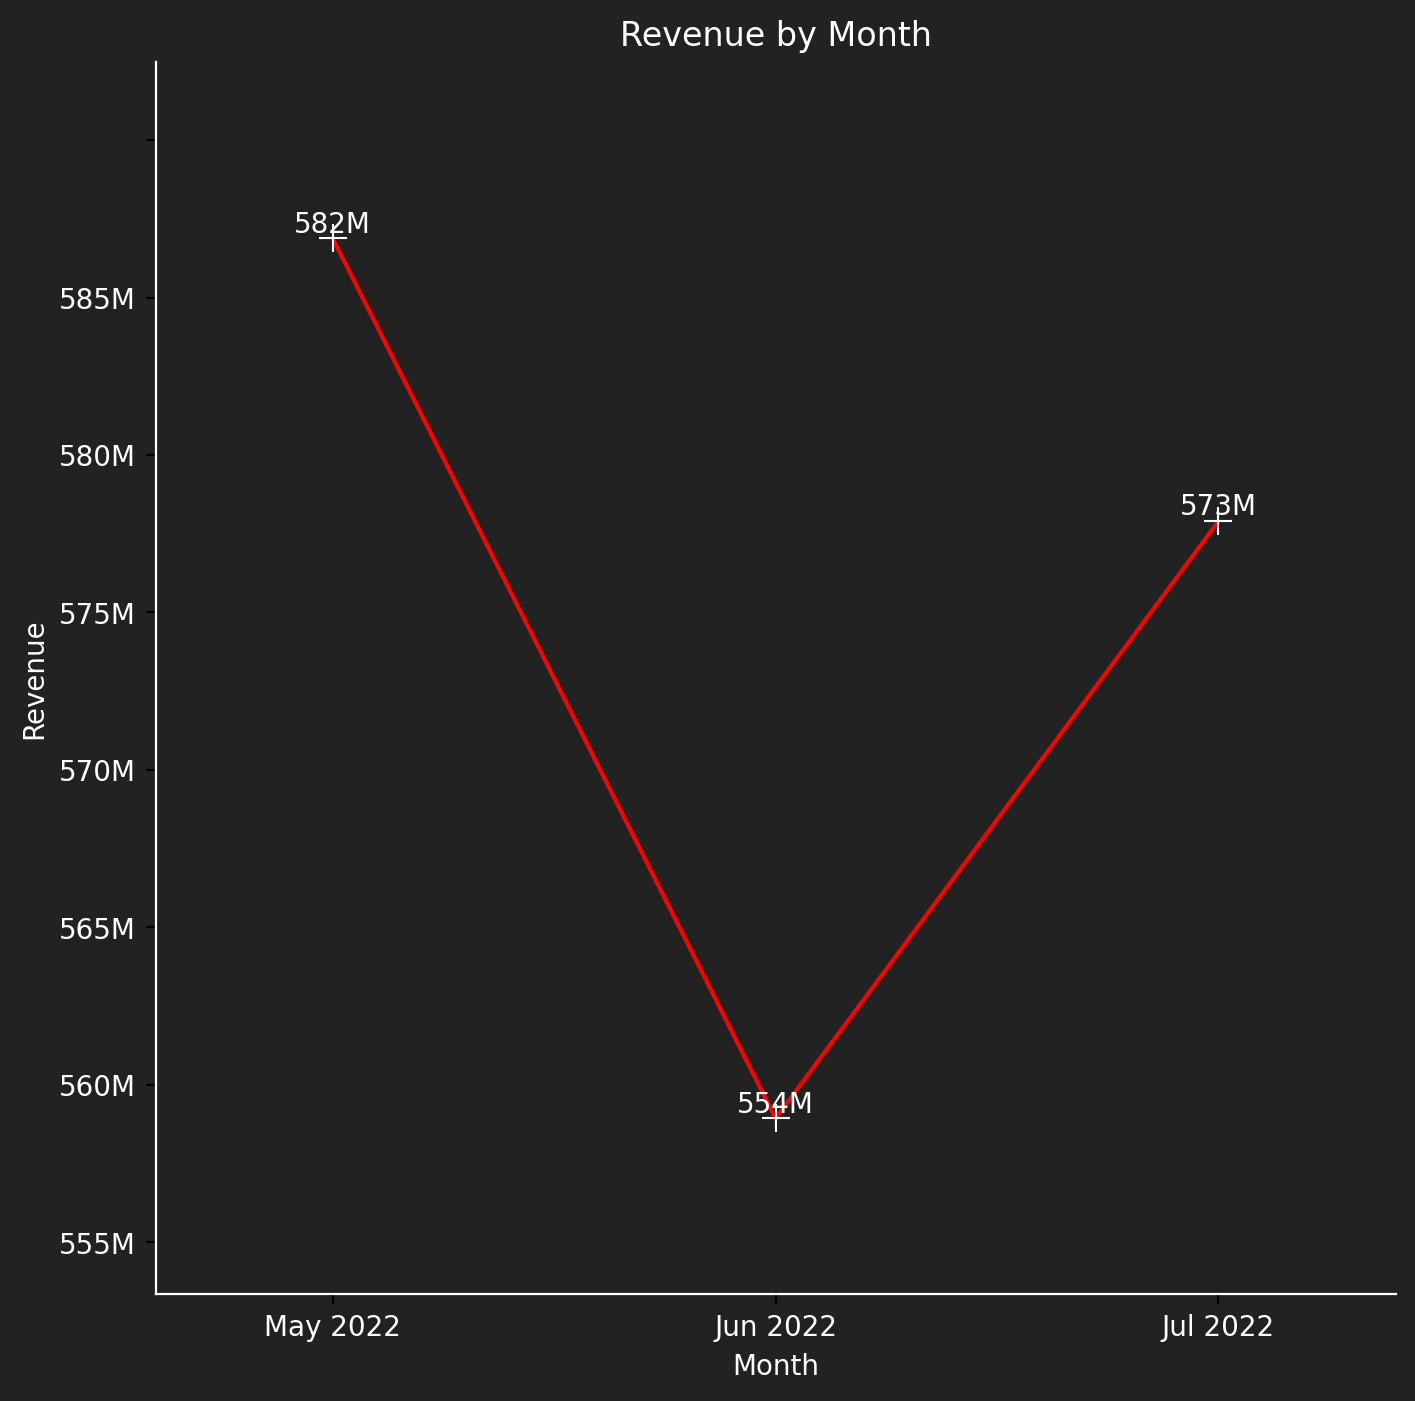

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi=200)
sns.lineplot(x=month_bookings.index, y=month_bookings.values, marker = '+', markersize = '10', color = 'red')

for i in range(len(month_bookings.index)):
  val = month_bookings[i]
  label = f'{val/1000000:.0f}M'
  plt.text(month_bookings.index[i], month_bookings.values[i], label, ha = 'center', va = 'bottom', color = 'white' )

plt.title('Revenue by Month', color = 'white')
plt.xlabel('Month', color = 'white')
plt.ylabel('Revenue', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
sns.despine(top=True, right=True)
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')

for spine in plt.gca().spines.values():
  spine.set_color('white')

plt.ticklabel_format(style="plain", axis = 'y')

y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{y/1000000:.0f}M' for y in y_labels], color='white')

plt.margins(0.2)
plt.show()
plt.savefig('Revenue by Month.png')

**Print revenue realized / hotels.**

In [ ]:
rr_hotels= bookings.groupby('property_name')['revenue_realized'].sum()
(rr_hotels/1000000).map("{:,.2f}M".format)

property_name
Atliq Bay        260.03M
Atliq Blu        260.86M
Atliq City       285.81M
Atliq Exotica    320.28M
Atliq Grands     211.52M
Atliq Palace     304.08M
Atliq Seasons     66.13M
Name: revenue_realized, dtype: object

In [ ]:
rr_hotels

property_name
Atliq Bay        260025978
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320279488
Atliq Grands     211523664
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

<ipython-input-760-7bbeb5c8d35e>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y/1000000:.0f}M' for y in y_labels], color='white')


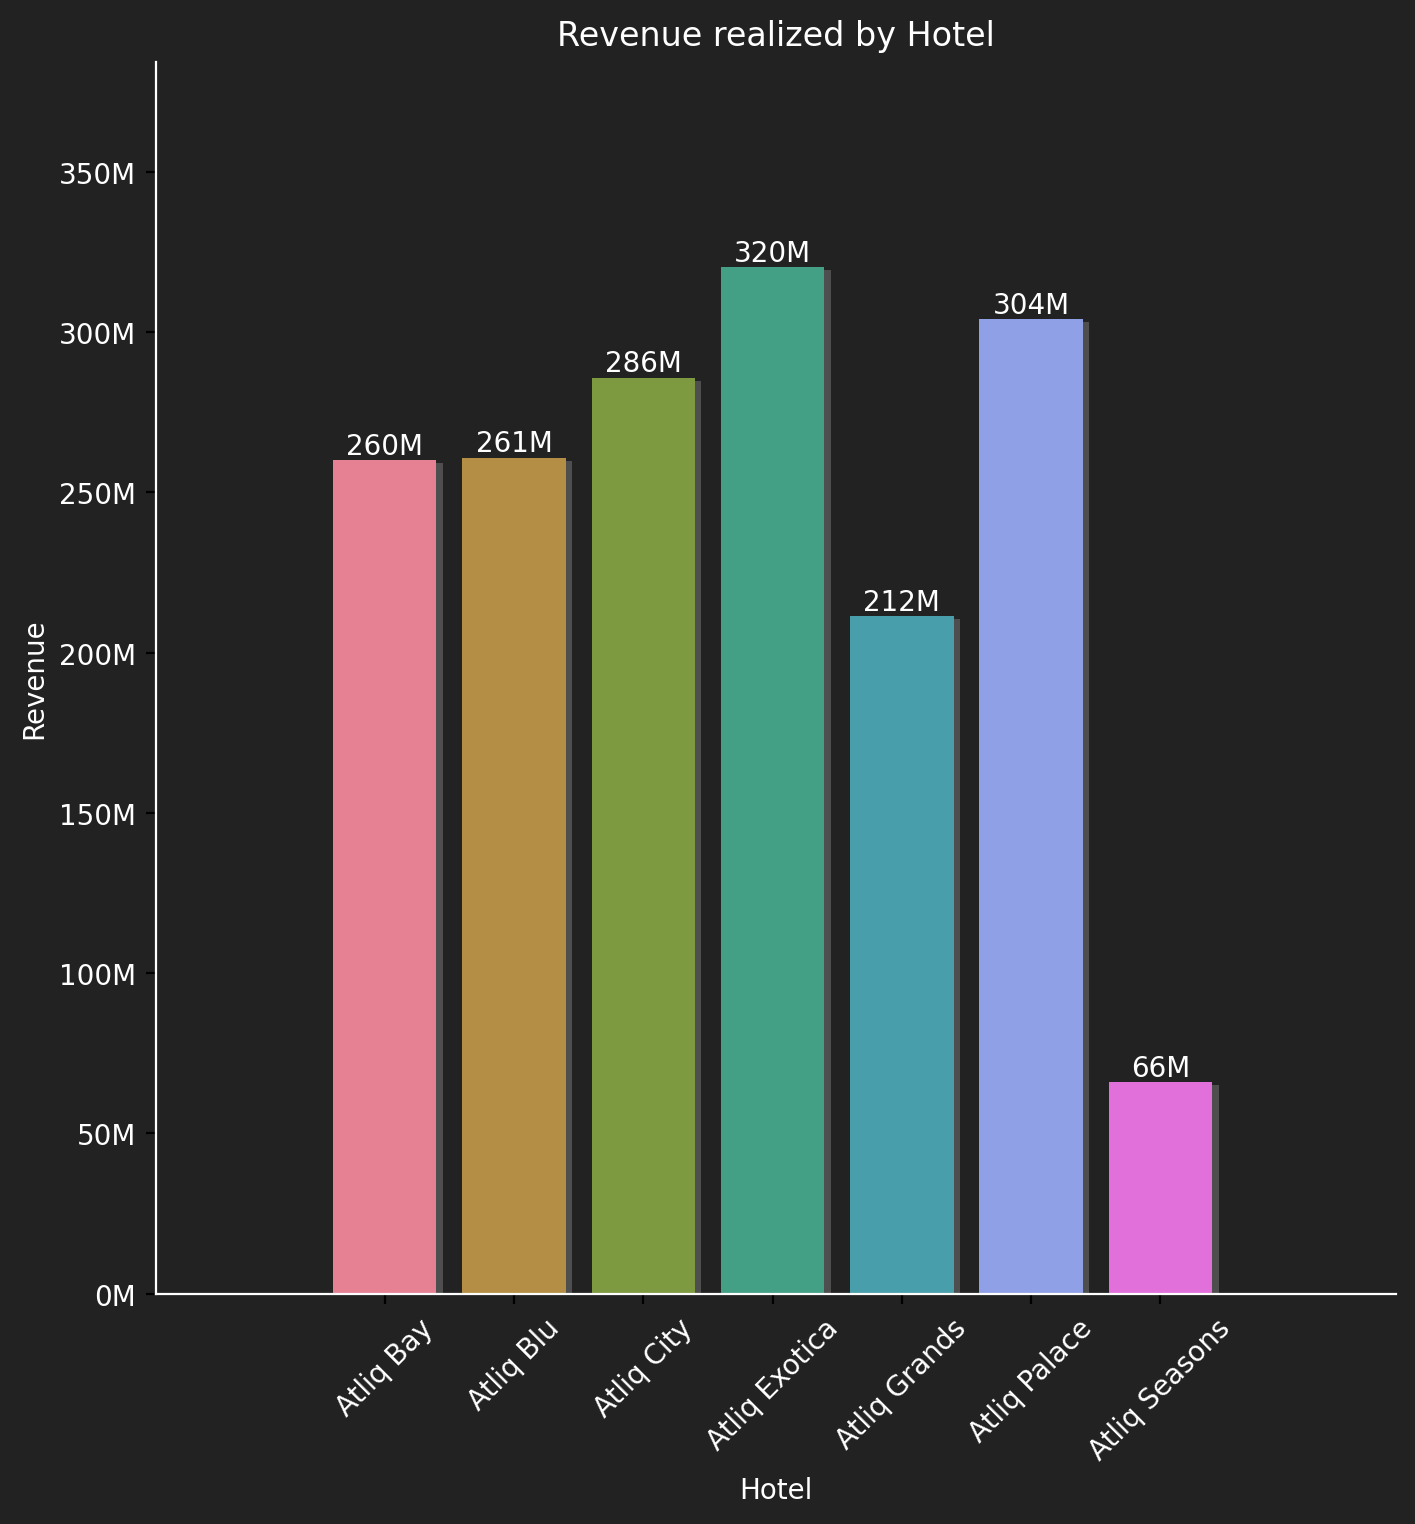

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi = 200)
sns.barplot(x = rr_hotels.index,
            y = rr_hotels.values,
            hue = rr_hotels.index)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(rr_hotels.index))
vertical_offset = 1000000

for i in range(len(rr_hotels.index)):
  val = rr_hotels[i]
  label = f'{val/1000000:.0f}M'
  plt.bar(index[i] + shadow_offset, val - vertical_offset, color='#ffffff', alpha=0.2, width=bar_width, zorder=0)
  plt.text(i, val, label, ha = 'center', va = 'bottom', color = 'white' )

plt.title('Revenue realized by Hotel', color = 'white')
plt.xlabel('Hotel', color = 'white')
plt.ylabel('Revenue', color = 'white')
plt.xticks(color = 'white', rotation = 45)
plt.yticks(color = 'white')
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')
sns.despine(top=True, right=True)

for spine in plt.gca().spines.values():
  spine.set_color('white')

plt.ticklabel_format(style="plain", axis = 'y')

y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{y/1000000:.0f}M' for y in y_labels], color='white')

plt.margins(0.2)
plt.show()
plt.savefig('Revenue realized by Hotel.png')

**Print revenue realized / category.**

In [ ]:
rev_category = bookings.groupby('category')['revenue_realized'].sum().sort_values(ascending = False)
(rev_category/1000000).map("{:,.2f}M".format)

category
Luxury      1,052.68M
Business      656.02M
Name: revenue_realized, dtype: object

In [ ]:
rev_category

category
Luxury      1052684652
Business     656019297
Name: revenue_realized, dtype: int64

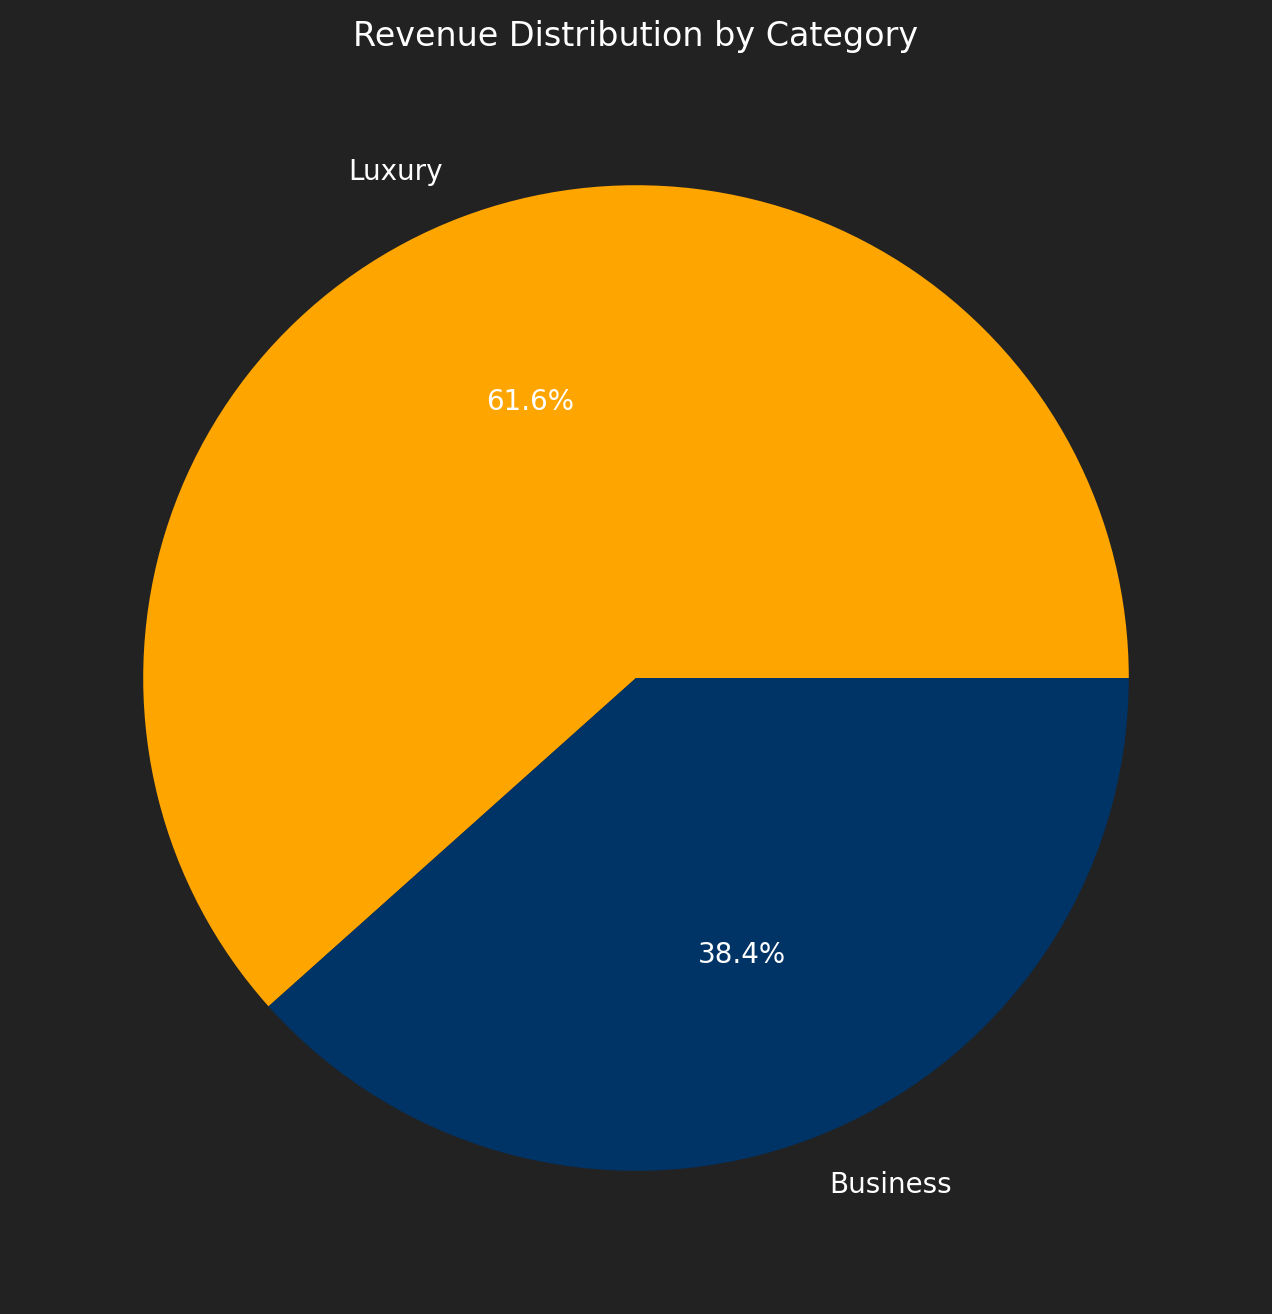

<Figure size 640x480 with 0 Axes>

In [ ]:
rev_category_million = rev_category / 1000000

# Define the labels for the pie chart with values in millions
labels = rev_category_million.map("{:,.2f}M".format)

# Create the pie chart
plt.figure(figsize=(8,8), dpi = 200)
wedges, texts, autotexts = plt.pie(rev_category_million, labels=rev_category.index, autopct='%1.1f%%',
                                   textprops=dict(color="w"))

# Add title
plt.title('Revenue Distribution by Category', color='white')

# Set face color for the plot
plt.gcf().set_facecolor('#222222')

# Change color of the text and percentage inside the pie chart
for text in texts + autotexts:
    text.set_color('white')

plt.show()
plt.savefig('Revenue Distribution by Category.png')

**Average rating / city.**

In [ ]:
rating_city = bookings.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending = False)
rating_city

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

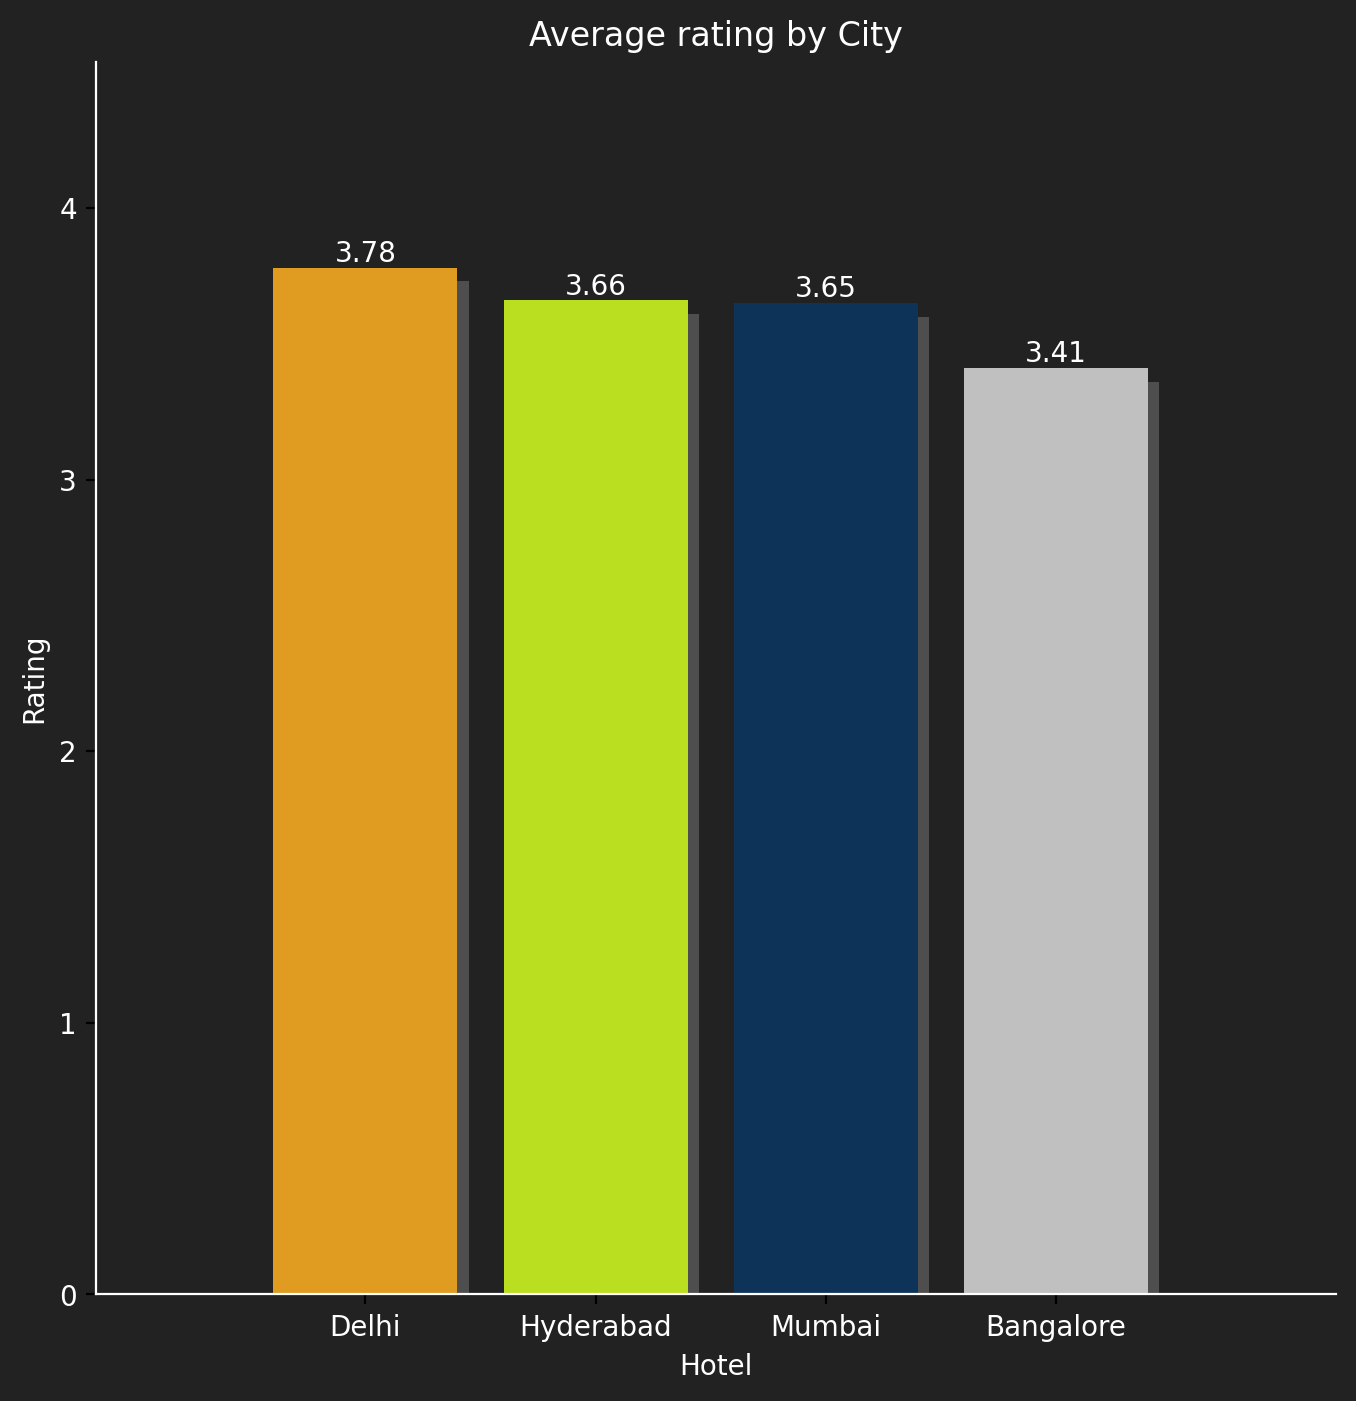

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi =200)
sns.barplot(x = rating_city.index,
            y = rating_city.values,
            hue = rating_city.index,
            hue_order = city_order)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(rating_city.index))
vertical_offset = 0.05

for i in range(len(rating_city.index)):
  val = rating_city[i]
  plt.bar(index[i] + shadow_offset, val - vertical_offset, color='#ffffff', alpha=0.2, width=bar_width, zorder=0)
  plt.text(i,rating_city.values[i], str(round(rating_city.values[i],2)), ha = 'center', va = 'bottom', color = 'white')

plt.title('Average rating by City', color = 'white')
plt.xlabel('Hotel', color = 'white')
plt.ylabel('Rating', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')
sns.despine(top=True, right=True)

for spine in plt.gca().spines.values():
  spine.set_color('white')


plt.margins(0.2)
plt.show()
plt.savefig('Revenue realized by Hotel.png')

**Revenue realized by each booking platform.**

In [ ]:
bp_revenue = bookings.groupby('booking_platform')['revenue_realized'].sum().sort_values(ascending = False)
(bp_revenue/1000000).map('{:,.3f}M'.format)

booking_platform
others            699.349M
makeyourtrip      340.835M
logtrip           187.545M
direct online     168.985M
tripster          123.067M
journey           102.531M
direct offline     86.392M
Name: revenue_realized, dtype: object

In [ ]:
bp_revenue

booking_platform
others            699348882
makeyourtrip      340834504
logtrip           187545388
direct online     168985307
tripster          123066801
journey           102531334
direct offline     86391733
Name: revenue_realized, dtype: int64

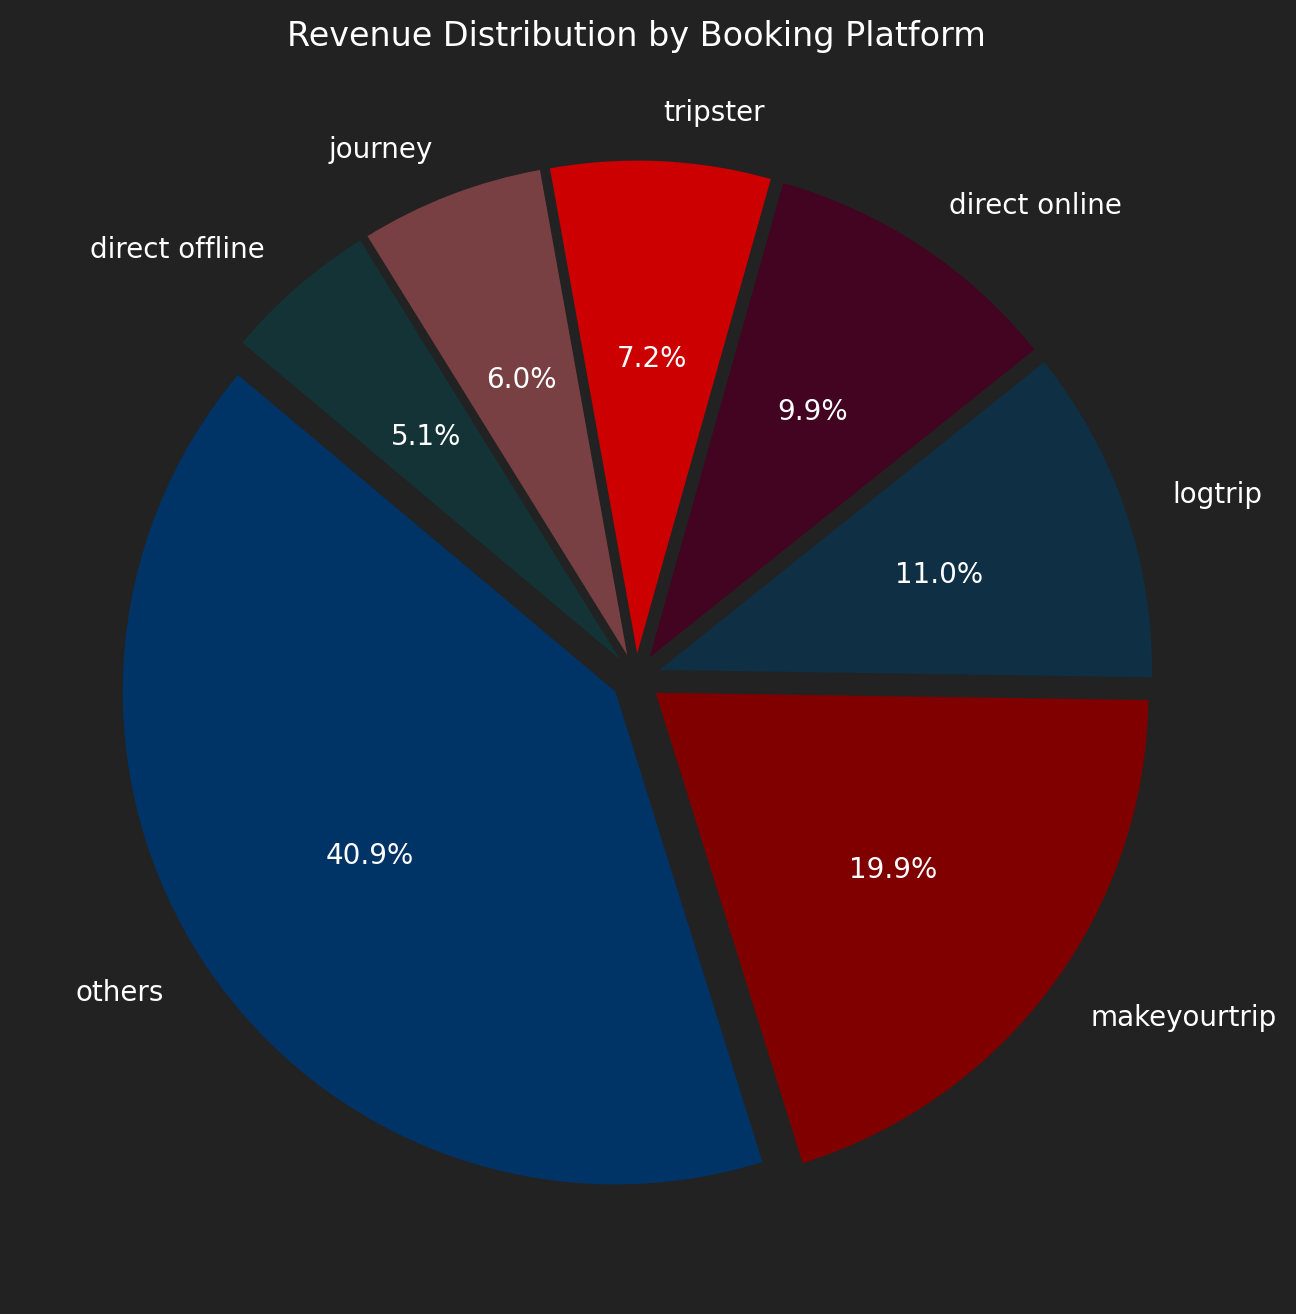

In [ ]:
bp_revenue_million = bp_revenue / 1000000

# Define the labels for the pie chart with values in millions
labels = bp_revenue_million.map("{:,.3f}M".format)

# Define the explode values (to "pie out" the slices)
explode = [0.05] * len(bp_revenue_million)  # Adjust the value as needed

colors = ['#003366','#800000','#0e2f44','#420420','#cc0000','#794044', '#133337']

# Create the pie chart
plt.figure(figsize=(8, 8), dpi=200)
wedges, texts, autotexts = plt.pie(bp_revenue_million, labels=bp_revenue.index, autopct='%1.1f%%',
                                   explode=explode, colors = colors, textprops=dict(color="w"), startangle=140)

# Add title
plt.title('Revenue Distribution by Booking Platform', color='white')

# Set face color for the plot
plt.gcf().set_facecolor('#222222')

# Change color of the text and percentage inside the pie chart
for text in texts + autotexts:
    text.set_color('white')

plt.show()

In [ ]:
guest = bookings.groupby('property_name')['no_guests'].mean().sort_values(ascending = False)
guest

property_name
Atliq Bay        2.273905
Atliq Exotica    2.262255
Atliq Blu        2.262078
Atliq Grands     2.254667
Atliq Seasons    1.727775
Atliq City       1.662779
Atliq Palace     1.656127
Name: no_guests, dtype: float64

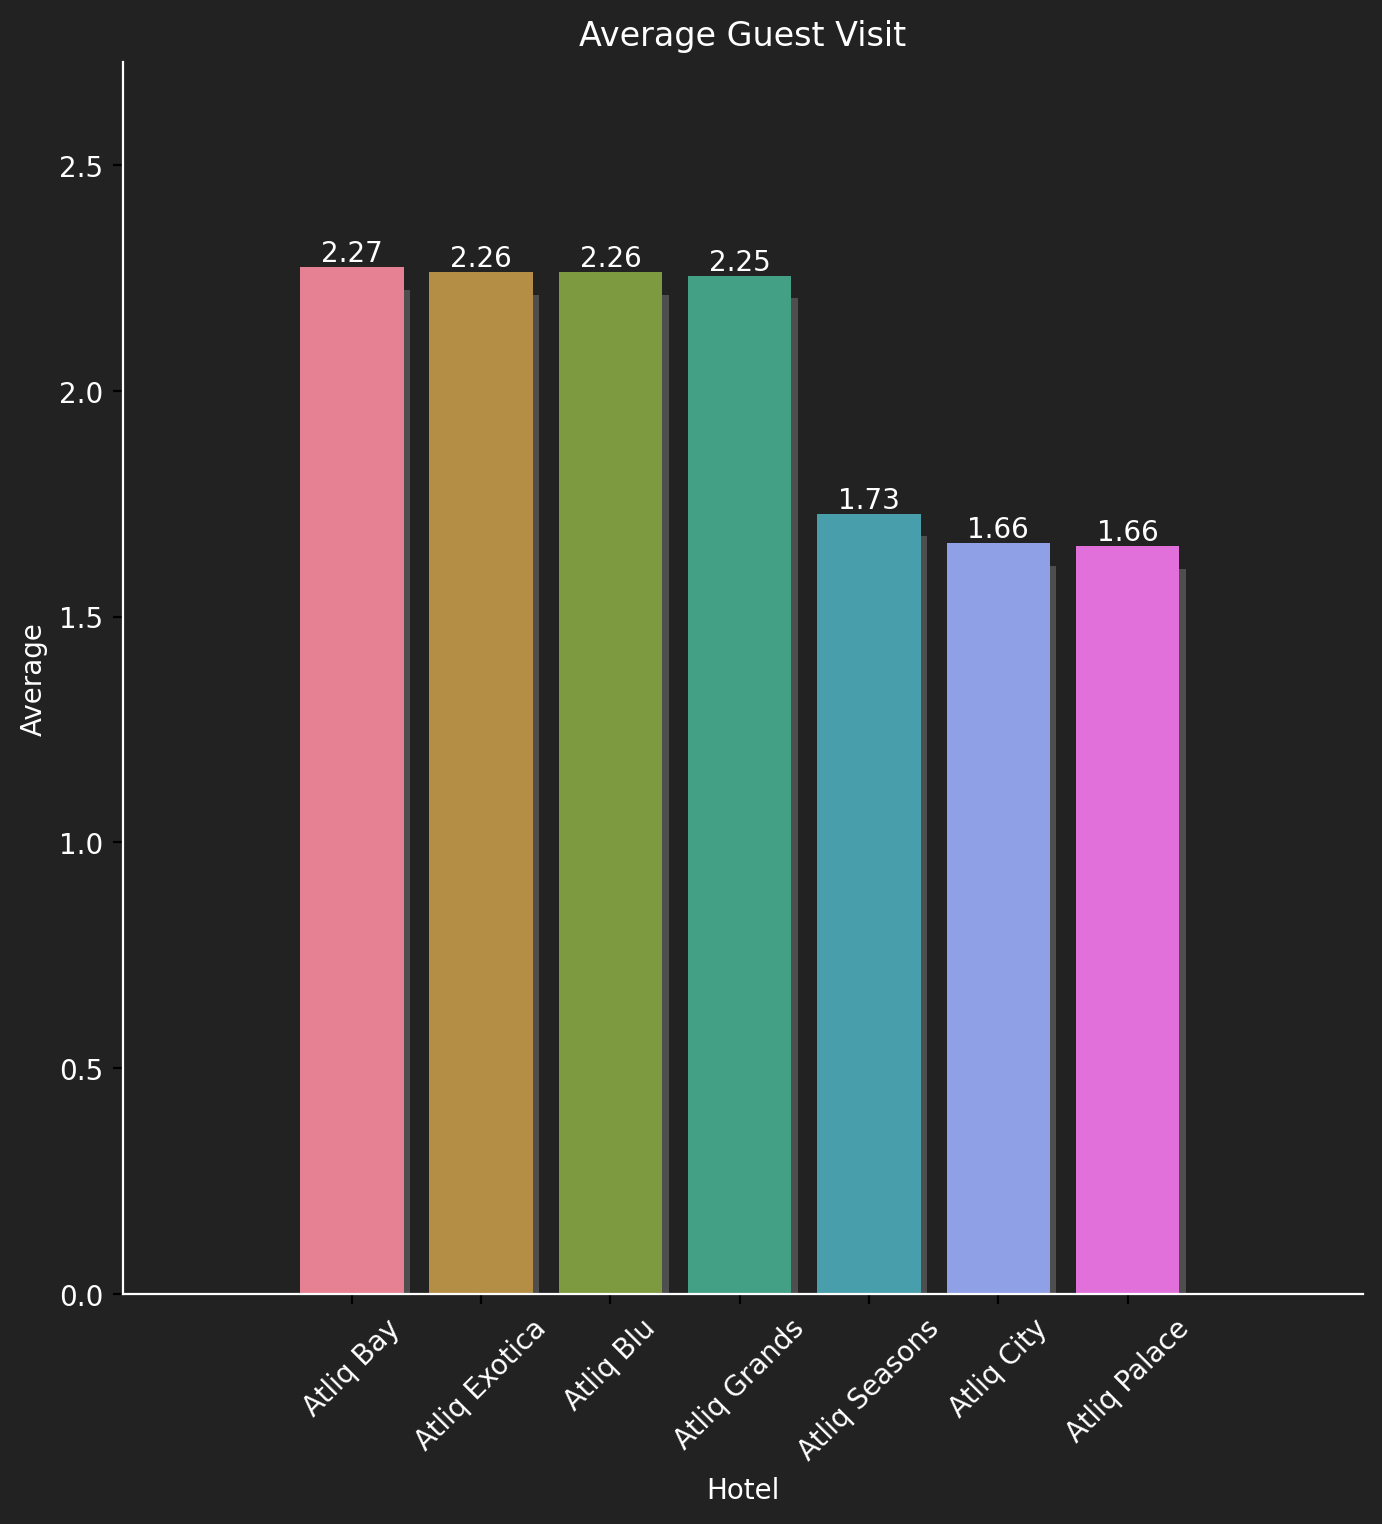

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8), dpi=200)
sns.barplot(x = guest.index,
            y = guest.values,
            hue = guest.index)

shadow_offset = 0.05
bar_width = 0.8
index = range(len(guest.index))
vertical_offset = 0.05

for i in range(len(guest.index)):
  val = guest[i]
  plt.bar(index[i] + shadow_offset, val - vertical_offset, color='#ffffff', alpha=0.2, width=bar_width, zorder=0)
  plt.text(i,guest.values[i], str(round(guest.values[i],2)), ha = 'center', va = 'bottom', color = 'white')

plt.title('Average Guest Visit', color = 'white')
plt.xlabel('Hotel', color = 'white')
plt.ylabel('Average', color = 'white')
plt.xticks(color = 'white', rotation = 45)
plt.yticks(color = 'white')
plt.gcf().set_facecolor('#222222')
plt.gca().set_facecolor('#222222')
sns.despine(top=True, right=True)

for spine in plt.gca().spines.values():
  spine.set_color('white')

plt.margins(0.2)
plt.show()
plt.savefig('Revenue realized by Hotel.png')